In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Step 1: Load the dataset
# Replace the path with the actual location of your dataset
data = pd.read_csv(r'C:\Users\Vishnu\Downloads\wine+quality\winequality-white.csv', sep=';')

In [22]:
# Step 2: Exploratory Data Analysis (EDA)
# Display dataset overview and summary statistics
print("Dataset Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Analyze the distribution of the target variable (wine quality)
class_dist = data['quality'].value_counts().sort_index()
total_samples = len(data)
class_ratios = (class_dist / total_samples * 100).round(2)

print("\nClass Distribution and Ratios:")
print("Quality | Count | Percentage")
print("-" * 30)
for quality, count in class_dist.items():
    ratio = class_ratios[quality]
    print(f"{quality:7d} | {count:5d} | {ratio:8.2f}%")

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    48

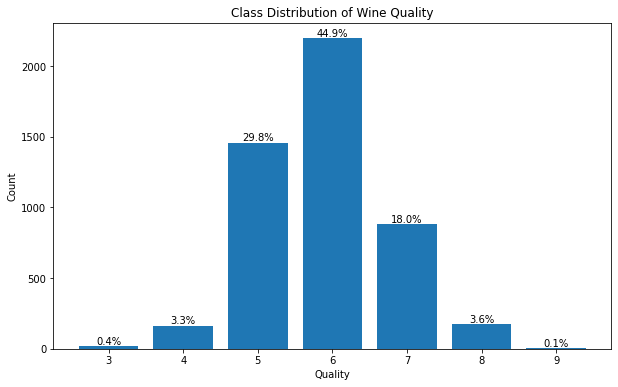

In [23]:
# Step 3: Visualize class distribution
plt.figure(figsize=(10, 6))
ax = plt.bar(class_dist.index, class_dist.values)
plt.title('Class Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

# Add percentage labels on top of each bar
for i, v in enumerate(class_dist.values):
    ratio = class_ratios[class_dist.index[i]]
    plt.text(class_dist.index[i], v, f'{ratio:.1f}%', ha='center', va='bottom')
plt.show()

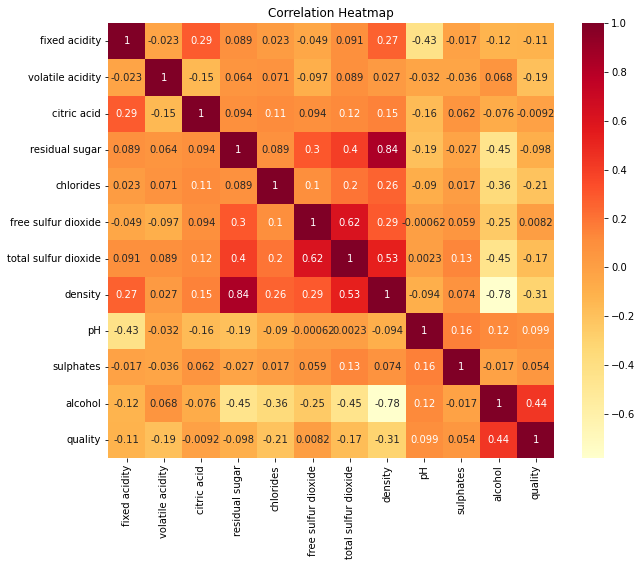

In [24]:
# Step 4: Correlation Heatmap
# Visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Step 5: Data Preparation
# Separate features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display class distribution in train and test sets
print("\nClass Distribution in Train and Test Sets:")
print("\nTrain Set Distribution:")
train_dist = y_train.value_counts().sort_index()
train_ratios = (train_dist / len(y_train) * 100).round(2)
for quality, count in train_dist.items():
    print(f"Quality {quality}: {count} samples ({train_ratios[quality]:.2f}%)")

print("\nTest Set Distribution:")
test_dist = y_test.value_counts().sort_index()
test_ratios = (test_dist / len(y_test) * 100).round(2)
for quality, count in test_dist.items():
    print(f"Quality {quality}: {count} samples ({test_ratios[quality]:.2f}%)")

# Scale features to normalize the range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Class Distribution in Train and Test Sets:

Train Set Distribution:
Quality 3: 16 samples (0.41%)
Quality 4: 130 samples (3.32%)
Quality 5: 1166 samples (29.76%)
Quality 6: 1758 samples (44.87%)
Quality 7: 704 samples (17.97%)
Quality 8: 140 samples (3.57%)
Quality 9: 4 samples (0.10%)

Test Set Distribution:
Quality 3: 4 samples (0.41%)
Quality 4: 33 samples (3.37%)
Quality 5: 291 samples (29.69%)
Quality 6: 440 samples (44.90%)
Quality 7: 176 samples (17.96%)
Quality 8: 35 samples (3.57%)
Quality 9: 1 samples (0.10%)


In [25]:
# Step 6: Model Evaluation Function
# Define a function to evaluate models using Repeated K-Fold Cross-Validation
def evaluate_model(model, X, y, metric='accuracy'):
    rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=42)
    scores = cross_val_score(model, X, y, scoring=metric, cv=rkf, n_jobs=-1)
    return np.mean(scores), np.std(scores)

In [26]:
# Step 7: Initialize Classifiers
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [27]:
# Step 8: Evaluate models on original data
svm_mean, svm_std = evaluate_model(svm_model, X_train_scaled, y_train, metric='accuracy')
rf_mean, rf_std = evaluate_model(rf_model, X_train_scaled, y_train, metric='accuracy')
print("\nPerformance on Original Data:")
print(f"SVM - Accuracy: {svm_mean:.4f} ± {svm_std:.4f}")
print(f"Random Forest - Accuracy: {rf_mean:.4f} ± {rf_std:.4f}")


Performance on Original Data:
SVM - Accuracy: 0.5676 ± 0.0094
Random Forest - Accuracy: 0.6506 ± 0.0134



Balanced Class Distribution and Ratios:
Quality | Count | Percentage
------------------------------
      3 |  1758 |    14.29%
      4 |  1758 |    14.29%
      5 |  1758 |    14.29%
      6 |  1758 |    14.29%
      7 |  1758 |    14.29%
      8 |  1758 |    14.29%
      9 |  1758 |    14.29%


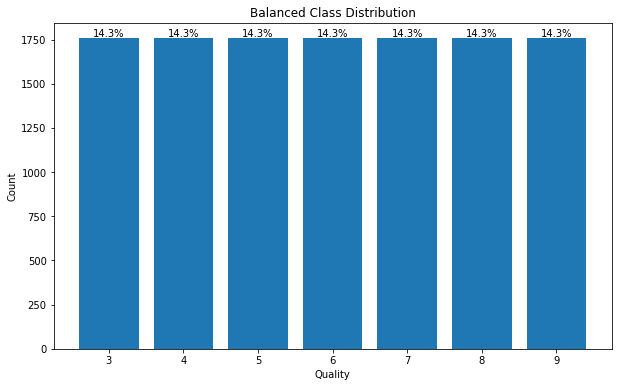

In [28]:
#Step 9: Handle Class Imbalance
# Use RandomOverSampler and RandomUnderSampler for balancing
oversample = RandomOverSampler(random_state=42)
undersample = RandomUnderSampler(random_state=42)
pipeline = Pipeline([('o', oversample), ('u', undersample)])
X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train_scaled, y_train)

# Display balanced class distribution
balanced_dist = y_train_balanced.value_counts().sort_index()
balanced_ratios = (balanced_dist / len(y_train_balanced) * 100).round(2)

print("\nBalanced Class Distribution and Ratios:")
print("Quality | Count | Percentage")
print("-" * 30)
for quality, count in balanced_dist.items():
    print(f"{quality:7d} | {count:5d} | {balanced_ratios[quality]:8.2f}%")
# Visualize balanced class distribution with percentages
plt.figure(figsize=(10, 6))
ax = plt.bar(balanced_dist.index, balanced_dist.values)
plt.title('Balanced Class Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

# Add percentage labels on top of each bar
for i, v in enumerate(balanced_dist.values):
    ratio = balanced_ratios[balanced_dist.index[i]]
    plt.text(balanced_dist.index[i], v, f'{ratio:.1f}%', 
             ha='center', va='bottom')
plt.show()

In [29]:
# Step 10: Evaluate models on balanced data
svm_mean_balanced, svm_std_balanced = evaluate_model(svm_model, X_train_balanced, y_train_balanced, metric='accuracy')
rf_mean_balanced, rf_std_balanced = evaluate_model(rf_model, X_train_balanced, y_train_balanced, metric='accuracy')
print("\nPerformance on Balanced Data:")
print(f"SVM - Accuracy: {svm_mean_balanced:.4f} ± {svm_std_balanced:.4f}")
print(f"Random Forest - Accuracy: {rf_mean_balanced:.4f} ± {rf_std_balanced:.4f}")


Performance on Balanced Data:
SVM - Accuracy: 0.7259 ± 0.0061
Random Forest - Accuracy: 0.9158 ± 0.0052


In [30]:
# Step 11: Final Model Training
# Select the best-performing model and train on the balanced data
best_model = rf_model if rf_mean_balanced > svm_mean_balanced else svm_model
best_model.fit(X_train_balanced, y_train_balanced)
y_pred = best_model.predict(X_test_scaled)

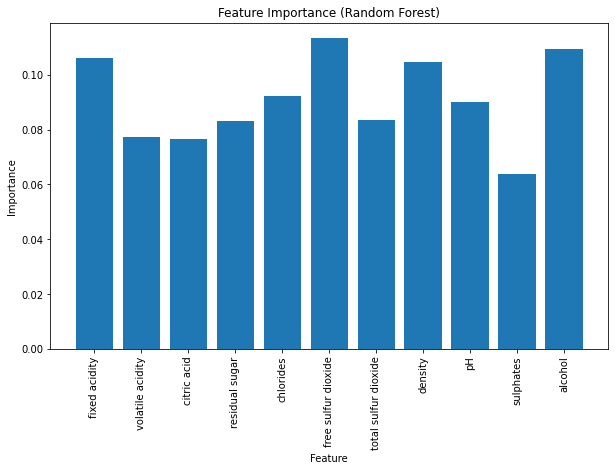

In [31]:
# Step 12: Feature Importance (if Random Forest is chosen)
if best_model == rf_model:
    feature_importances = best_model.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, feature_importances)
    plt.xticks(rotation=90)
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

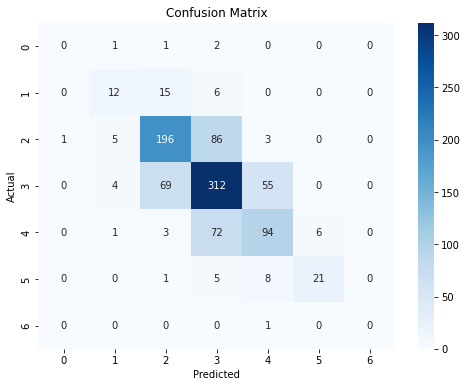

In [32]:
# Step 13: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# Step 14: Classification Report
print("\nFinal Model Performance on Test Set:")
print(classification_report(y_test, y_pred))


Final Model Performance on Test Set:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.52      0.36      0.43        33
           5       0.69      0.67      0.68       291
           6       0.65      0.71      0.68       440
           7       0.58      0.53      0.56       176
           8       0.78      0.60      0.68        35
           9       0.00      0.00      0.00         1

    accuracy                           0.65       980
   macro avg       0.46      0.41      0.43       980
weighted avg       0.64      0.65      0.64       980



C:\Users\Vishnu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vishnu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vishnu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,